<a href="https://colab.research.google.com/github/4deepprk/4deepprk.github.io/blob/master/Dl_104_FNN_vs_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline


*   Generate data that is not linearly separable
*   Train with sigmoid neuron and see the performance
*   Write from scratch Feed Forward Neural Network (FFNN)
*   Train FFNN on the data and compare with sigmoid neuron
*   Write a generic class for a FF network
*   Train generic class on binary classification
*   Generate data for multi-class classification
*   Train a FF network for 7
*   Use softmax as the output layer and cross-entropy loss function
*   Train with 8 for multi-class classification
*   Exercises on other datasets

# Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

# Sigmoid Neuron

In [0]:
class SigmoidNeuron:

  # 1 initialization of parameter
  def __init(self):
    self.w = None
    self.b = None

  # 2 model - forward propogation
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0 / (1.0 + np.exp(-x))
  
  # 3 gradient computation
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")

  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  # 4 learning or fitting
  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, 
          loss_fn = "mse", display_loss = False):
    
    ## initialise w and b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y)
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
      # m is dependent upon learning rate where m is # data points 
      # Division by m keeps learning rate independent of m (normalisation)
      m = X.shape[0]
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m

      if display_loss:
        plt.plot(list(loss.values()))
        # plt.plot(loss.values())
        plt.xlabel("Epochs")
        if loss_fn == "mse":
          plt.ylabel("Mean Squared Error")
        elif loss_fn == "ce":
          plt.y_label("Log Loss")
        plt.show()
  
  # 4 prediction predicts output when input features and trained model are given 
  def predict(self, X):
    Y_pred = [] 
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [0]:
# color map to visualize the target variable
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", 
                                                                   "yellow", 
                                                                   "green",
                                                                   "blue"])

# Generate data

In [4]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, 
                          random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


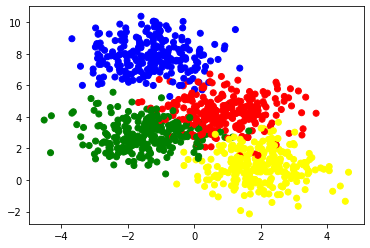

In [5]:
# x1, x2, y(4 labels) -> 3 dimensional
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=my_cmap)
plt.show()

In [0]:
labels_original = labels
# for binary classification purpose 2 labels are made out of 4 labels
labels = np.mod(labels_original, 2)

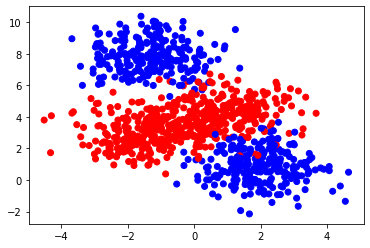

In [7]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=my_cmap)
# Now true label is of 2 classes with blue and red where true decision boundary 
# is not linear
plt.show() # true decision boundary (non-linear)

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels,
                                                  random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


# Sigmoid neuron classification

In [0]:
# model instantiation
sn = SigmoidNeuron()
# training the model
sn.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.5, 
       display_loss = True)

In [10]:
# model prediction

# forward pass prediction
Y_pred_train = sn.predict(X_train)
# binarise for accuracy purpose
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

# forward pass prediction
Y_pred_val = sn.predict(X_val)
# binarise for accuracy purpose
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.65
Validation accuracy 0.57


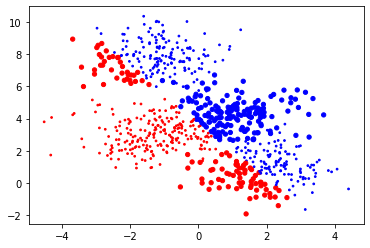

' We can infer that our sigmoid functions does not perform well for non-linear\ndata and that is why the decision boundary in this plot is exactly trying to \ndraw decision boundary in linear manner when compared with the actual plot where\nthe function is non-linear '

In [11]:
# Visualizing how the model is predicting the classes correctly and incoorectly
# 4 dimensions: x1, x2, predicted class, predicted class correct and incorrect
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap,
            s=15*(np.abs(Y_pred_binarised_train - Y_train) + 0.2))

# large reds and blues are incorrect classification
# small reds and blues are correct classification
plt.show()
''' We can infer that our sigmoid functions does not perform well for non-linear
data and that is why the decision boundary in this plot is exactly trying to 
draw decision boundary in linear manner when compared with the actual plot where
the function is non-linear ''' # refer true decision boundary (non-linear) above
# Clearly sigmoid neuron performs poor for non-linear data

# First Feed Forward Neural Network

In [0]:
class FFFNN:
# 3 sigmoid neurons are used
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0

  def sigmoid(self, x):
    return 1.0 / (1.0 + np.exp(-x))
  
  # given input x compute output y
  def forward_pass(self, x):
    self.x1, self.x2 = x # assigns column 1 and column2 values to x1 and x2
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3

  def grad(self, x, y):
    self.forward_pass(x)

    self.dw5 = (self.h3 - y) * self.h3*(1 - self.h3) * self.h1
    self.dw6 = (self.h3 - y) * self.h3*(1 - self.h3) * self.h2
    self.db3 = (self.h3 - y) * self.h3*(1 - self.h3)

    self.dw1 = (self.h3 - y) * self.h3*(1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x1
    self.dw2 = (self.h3 - y) * self.h3*(1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x2
    self.db1 = (self.h3 - y) * self.h3*(1 - self.h3) * self.w5 * self.h1 * (1 - self.h1)

    self.dw3 = (self.h3 - y) * self.h3*(1 - self.h3) * self.w6 * self.h2 * (1 - self.h2) * self.x1
    self.dw4 = (self.h3 - y) * self.h3*(1 - self.h3) * self.w6 * self.h2 * (1 - self.h2) * self.x2
    self.db2 = (self.h3 - y) * self.h3*(1 - self.h3) * self.w6 * self.h2 * (1 - self.h2)

  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):

    # Initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
    
    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3

      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error")
      plt.show()
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# FFN classification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


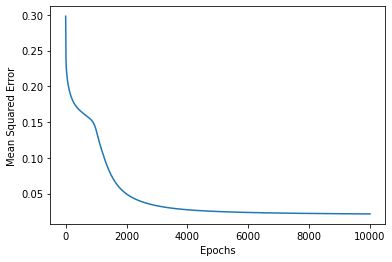

In [16]:
ffn = FFFNN()
ffn.fit(X_train, Y_train, epochs = 10000, learning_rate = 0.50, display_loss = True)

In [17]:
# model prediction

# forward pass prediction
Y_pred_train = ffn.predict(X_train)
# binarise for accuracy purpose
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

# forward pass prediction
Y_pred_val = ffn.predict(X_val)
# binarise for accuracy purpose
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


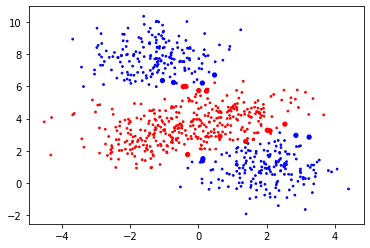

In [18]:
# Visualizing how the model is predicting the classes correctly and incoorectly
# 4 dimensions: x1, x2, predicted class, predicted class correct and incorrect
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap,
            s=15*(np.abs(Y_pred_binarised_train - Y_train) + 0.2))

# large reds and blues are incorrect classification
# small reds and blues are correct classification
plt.show()

''' After some bit of hyper-parameter tunning we can see how our simple Feed 
Forward Neural Network (build only with 3 sigmoid neurons) has resulted in a
training accuracy of 0.98 and validation being 0.94 when epochs = 10000 and 
learning rate = 0.5. From this it is very clear that FFN can approximate pretty
much close to the true non-linear function when compared to the sigmoid model'''